In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../data/gene_expression.csv')
df.head()

,Gene One,Gene Two,Cancer Present
0,4.3,3.9,1
1,2.5,6.3,0
2,5.7,3.9,1
3,6.1,6.2,0
4,7.4,3.4,1


<AxesSubplot:xlabel='Gene One', ylabel='Gene Two'>

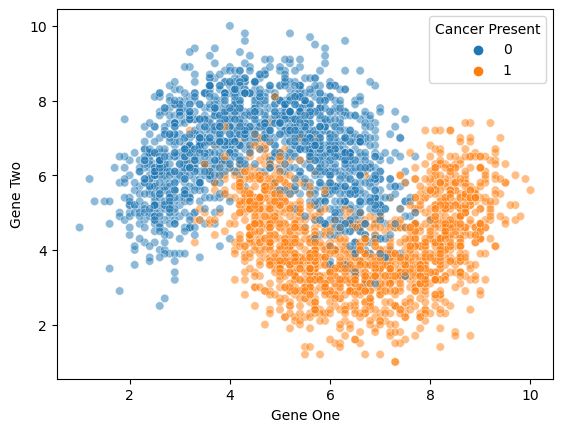

In [3]:
sns.scatterplot(x='Gene One',y='Gene Two',data=df,hue='Cancer Present',alpha=0.5)

(4.0, 8.0)

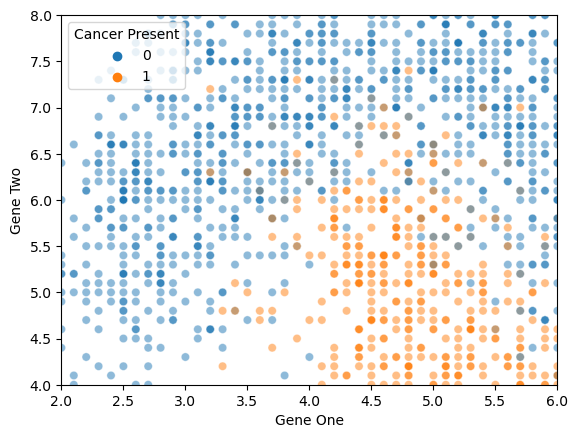

In [4]:
sns.scatterplot(x='Gene One',y='Gene Two',data=df,hue='Cancer Present',alpha=0.5)
plt.xlim((2,6))
plt.ylim((4,8))

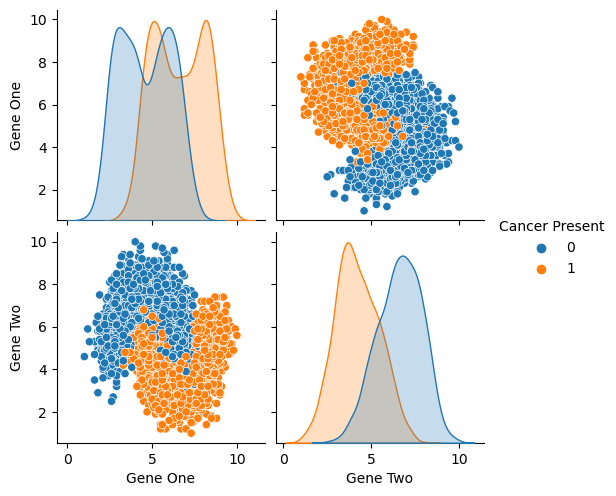

In [5]:
sns.pairplot(data=df,hue='Cancer Present')

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [7]:
X = df.drop('Cancer Present',axis=1)
y = df['Cancer Present']

In [8]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [9]:
scaler = StandardScaler()
X_scaled_train = scaler.fit_transform(X_train)
X_scaled_test = scaler.transform(X_test)

In [10]:
from sklearn.neighbors import KNeighborsClassifier

In [11]:
model = KNeighborsClassifier(n_neighbors=1)

In [12]:
model.fit(X_scaled_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [13]:
p = model.predict(X_scaled_test)

In [14]:
from sklearn.metrics import confusion_matrix,classification_report

In [15]:
confusion_matrix(y_test,p)

array([[426,  44],
       [ 45, 385]], dtype=int64)

In [16]:
print(classification_report(y_test,p))

              precision    recall  f1-score   support

           0       0.90      0.91      0.91       470
           1       0.90      0.90      0.90       430

    accuracy                           0.90       900
   macro avg       0.90      0.90      0.90       900
weighted avg       0.90      0.90      0.90       900



In [17]:
from sklearn.metrics import accuracy_score

In [18]:
accuracy_score(y_test,p)

0.9011111111111111

In [19]:
test_error_rates = []
for k in range(1,30):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_scaled_train,y_train)
    
    y_p = knn_model.predict(X_scaled_test)
    test_error = 1 - accuracy_score(y_test,y_p)
    test_error_rates.append(test_error)

In [20]:
test_error_rates

[0.09888888888888892,
 0.09777777777777774,
 0.07333333333333336,
 0.0755555555555556,
 0.07222222222222219,
 0.06444444444444442,
 0.06444444444444442,
 0.061111111111111116,
 0.05777777777777782,
 0.06222222222222218,
 0.061111111111111116,
 0.06000000000000005,
 0.061111111111111116,
 0.06222222222222218,
 0.05888888888888888,
 0.05777777777777782,
 0.05666666666666664,
 0.05555555555555558,
 0.05222222222222217,
 0.053333333333333344,
 0.054444444444444406,
 0.05111111111111111,
 0.054444444444444406,
 0.054444444444444406,
 0.05666666666666664,
 0.05555555555555558,
 0.05555555555555558,
 0.05777777777777782,
 0.05666666666666664]

Text(0.5, 0, 'K Neighbours')

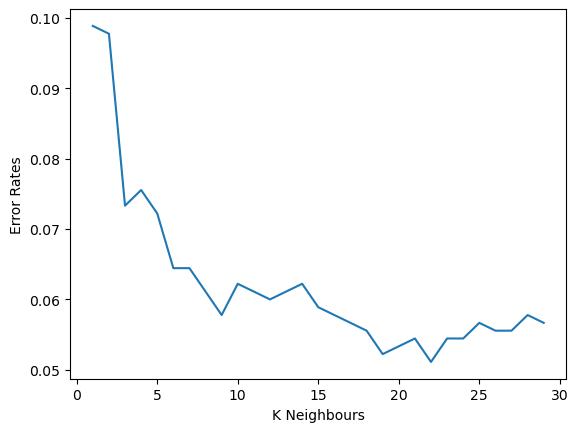

In [22]:
plt.plot(range(1,30),test_error_rates)
plt.ylabel('Error Rates')
plt.xlabel('K Neighbours')

In [23]:
scaler = StandardScaler()
knn = KNeighborsClassifier()
knn.get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

In [24]:
operations = [('scaler',scaler),('knn',knn)]

In [25]:
from sklearn.pipeline import Pipeline

In [26]:
pipe = Pipeline(operations)

In [27]:
from sklearn.model_selection import GridSearchCV

In [33]:
k_values = list(range(1,20))

In [37]:
param_grid = {'knn__n_neighbors':k_values}

In [40]:
full_cv = GridSearchCV(pipe,param_grid=param_grid,scoring='accuracy',cv=5)

In [41]:
full_cv.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19]},
             scoring='accuracy')

In [43]:
full_cv.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('knn', KNeighborsClassifier(n_neighbors=16))],
 'verbose': False,
 'scaler': StandardScaler(),
 'knn': KNeighborsClassifier(n_neighbors=16),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 16,
 'knn__p': 2,
 'knn__weights': 'uniform'}

In [44]:
y_p = full_cv.predict(X_test)

In [45]:
confusion_matrix(y_test,y_p)

array([[449,  21],
       [ 31, 399]], dtype=int64)

In [46]:
print(classification_report(y_test,y_p))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       470
           1       0.95      0.93      0.94       430

    accuracy                           0.94       900
   macro avg       0.94      0.94      0.94       900
weighted avg       0.94      0.94      0.94       900



In [47]:
new_patient = [[3.8,6.4]]

In [48]:
full_cv.predict(new_patient)

C:\sofware\anaconda3\envs\udemy\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [49]:
full_cv.predict_proba(new_patient)

C:\sofware\anaconda3\envs\udemy\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[1., 0.]])